In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import pynance as pn

import sys
sys.path.insert(1, '../scripts')
from talib_analysis import TechnicalIndicators


In [2]:
# Load stock price dataset
stock_df = pd.read_csv('../../data/yfinance_data/TSLA_historical_data.csv')

# Convert date column to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

# Sort by date for consistency
stock_df.sort_values(by='Date', inplace=True)

# Check for missing values
print(stock_df.isnull().sum())
stock_df.dropna(inplace=True)  # Drop missing values if necessary

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [3]:
ti = TechnicalIndicators(stock_df, price_col='Close')
ti.add_all()

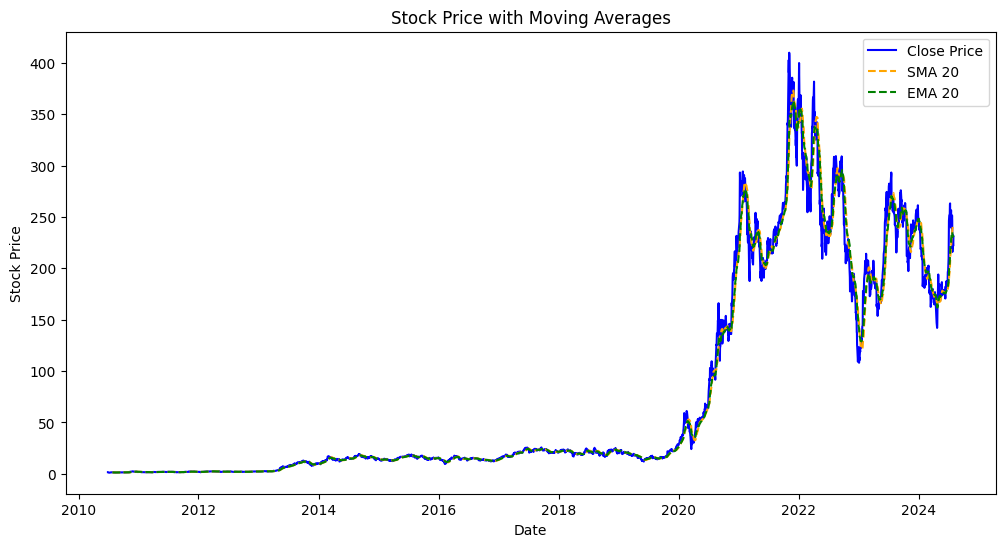

In [4]:
plt.figure(figsize=(12,6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['Date'], stock_df['SMA_20'], label='SMA 20', linestyle='dashed', color='orange')
plt.plot(stock_df['Date'], stock_df['EMA_20'], label='EMA 20', linestyle='dashed', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

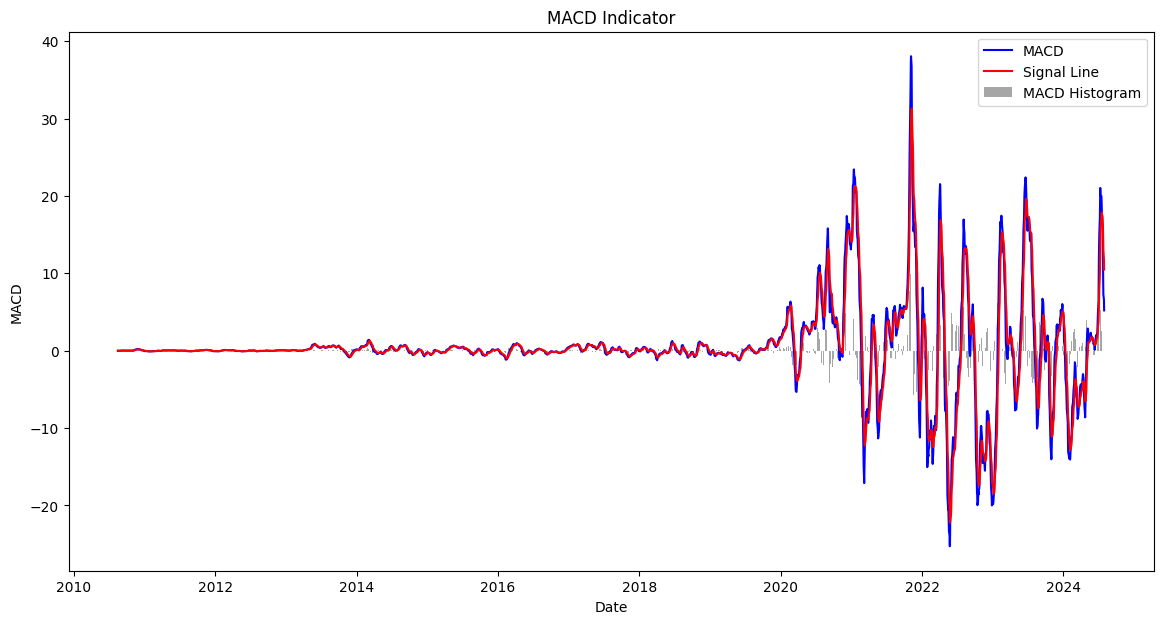

In [5]:
plt.figure(figsize=(14, 7))

# Plot MACD and Signal
plt.plot(stock_df['Date'], stock_df['MACD'], label='MACD', color='blue')
plt.plot(stock_df['Date'], stock_df['MACD_signal'], label='Signal Line', color='red')

# Plot MACD Histogram as bar chart
plt.bar(stock_df['Date'], stock_df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Indicator')
plt.legend()
plt.show()